## How to explore the input space to a generator
Inspired by [this](https://machinelearningmastery.com/how-to-interpolate-and-perform-vector-arithmetic-with-faces-using-a-generative-adversarial-network/) tutorial by Jason Brownlee.

Generators learn to map points in the space of **random noise** to the space of **images**. We call this random-noise-space the "latent" space, latent meaning "hidden". It's hidden because to us, the noise doesn't have any meaning - it's literally random numbers. It only has meaning to the generator model, which has been trained to create meaning out of these random numbers.


So, what does it mean to "explore" the latent space? It's all about vector arithmetic. If you have two vectors (or points in space) you can draw a line between them, and find the midpoint.

For our generator, those two points in space are two different images. We can "draw a line" between the two images in latent space and find the midpoint. What happens if we now pass the midpoint through the generator? We should get the "average" of the two images!


Let's try it out. First, we'll load up a generator that has already been trained.


In [1]:
%matplotlib inline
from tools import *
import torch
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np


In [2]:
noise_size = 100
generator  = Generator(noise_size)
generator_parameters = torch.load('saved_models/pretrained_generator', map_location='cpu')
generator.load_state_dict(generator_parameters['net_state_dict'])
print('Loaded')


Loaded


Next, we'll choose two random points in the latent space to interpolate between.

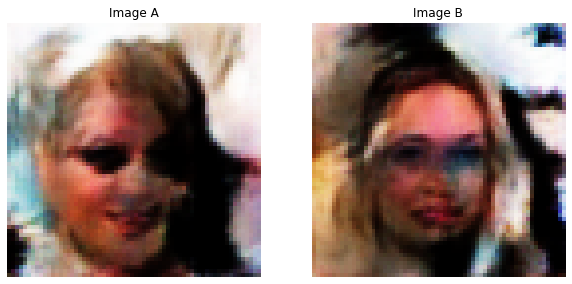

In [11]:
noise1 = torch.randn(1,noise_size,1,1)
noise2 = torch.randn(1,noise_size,1,1)

# Pass noise through generator and visualize the images it creates
image1 = generator(noise1)
image2 = generator(noise2)

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].axis("off")
ax[1].axis('off')
ax[0].set_title('Image A')
ax[1].set_title('Image B')
ax[0].imshow(visualize(image1[0].detach()))
ax[1].imshow(visualize(image2[0].detach()))
plt.show()


### Creating "midway" image

We now have our noise vectors, noise1 and noise2. Let's do the following:

1. Calculate the midway point
2. Pass it through the generator
3. Visualize the result



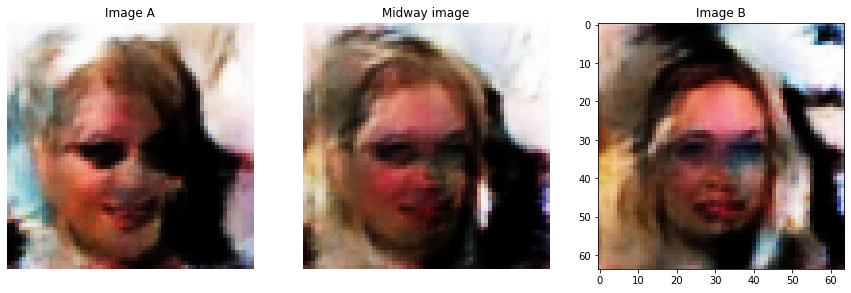

In [13]:
midway_point = 0.5*noise1 + 0.5*noise2
midway_image = generator(midway_point)



fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].axis("off")
ax[1].axis('off')
ax[0].set_title('Image A')
ax[1].set_title('Midway image')
ax[2].set_title('Image B')

ax[0].imshow(visualize(image1[0].detach()))
ax[1].imshow(visualize(midway_image[0].detach()))
ax[2].imshow(visualize(image2[0].detach()))
plt.show()

![vector image](resources/latent-image-example.png)